In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

# 1.  [20 pts] Download the dataset, unzip and explore the file folders. Load the image dataset with training and testing grouped.

In [2]:
%%time
import cv2
import os
IMGSIZE = (128, 128)
X_tr, y_tr, X_ts, y_ts = [], [], [], []
_path = '../input/intel-image-classification'
_labels = ['buildings','forest','glacier','mountain','sea','street']
CNAMES = ['buildings','forest','glacier','mountain','sea','street']

for label in _labels:
    path = _path + '/seg_train/seg_train/' + label
    print(path)
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_tr += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
        y_tr += [CNAMES.index(label)]
    path = _path + '/seg_test/seg_test/' + label
    print(path)
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_ts += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
        y_ts += [CNAMES.index(label)]

../input/intel-image-classification/seg_train/seg_train/buildings
../input/intel-image-classification/seg_test/seg_test/buildings
../input/intel-image-classification/seg_train/seg_train/forest
../input/intel-image-classification/seg_test/seg_test/forest
../input/intel-image-classification/seg_train/seg_train/glacier
../input/intel-image-classification/seg_test/seg_test/glacier
../input/intel-image-classification/seg_train/seg_train/mountain
../input/intel-image-classification/seg_test/seg_test/mountain
../input/intel-image-classification/seg_train/seg_train/sea
../input/intel-image-classification/seg_test/seg_test/sea
../input/intel-image-classification/seg_train/seg_train/street
../input/intel-image-classification/seg_test/seg_test/street
CPU times: user 12.6 s, sys: 4.2 s, total: 16.8 s
Wall time: 34.5 s


Display a few images. How many image channels are there?

In [3]:
X_tr[0].shape


(128, 128, 3)

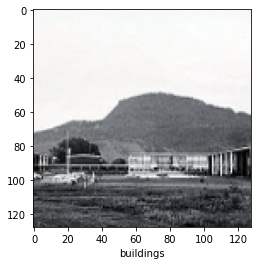

In [4]:
import matplotlib.pyplot as plt
print()
plt.figure()
plt.imshow(X_tr[0])
plt.xlabel(CNAMES[y_tr[0]])
plt.show()


## ANSWER: 3 channels

# 2. [20 pts] Convert the imageset to numpy array, such as the array size:

In [5]:
X_tr_np = np.array(X_tr)

In [6]:
X_tr_np.shape

(14034, 128, 128, 3)

In [7]:
X_ts_np = np.array(X_ts)

In [8]:
X_ts_np.shape

(3000, 128, 128, 3)

In [9]:
np.max(X_tr_np)

255

In [10]:
y_tr_np = np.array(y_tr)

In [11]:
y_ts_np = np.array(y_ts)

### scale 0 to 1

In [12]:
X_tr_np = X_tr_np / 255.0
X_ts_np = X_ts_np / 255.0

In [13]:
np.max(X_tr_np)

1.0

# 3. [40 pts] Create a convolutional neural network to train and report its performance on the
testing portion of the dataset. 95% reclassification and 75% testing performance should be
easily achievable without any hyperparameter tuning. (Hint: My model, which is similar to
the model in module notebook, took around 10 minutes to train 10 epochs.)

In [14]:
# Clear session
tf.keras.backend.clear_session()

In [15]:
# Our full CNN neural network
cnn1 = tf.keras.Sequential()

cnn1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),
    data_format='channels_last',
    name='conv_1', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))

cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))

cnn1.add(tf.keras.layers.Dense(units=6, name='fc_2', activation='softmax'))

In [16]:
# Set a seed for repeatibility
tf.random.set_seed(0)

# Build the model
cnn1.build(input_shape=(None, 128, 128, 3))

# Compile the model with the optimizer, loss function and metric
cnn1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 7

In [17]:
# %%time
# history = cnn1.fit(X_tr_np, y_tr_np,
#         epochs=NUM_EPOCHS,
#         shuffle=True)

## test accuracy

In [18]:
# loss, acc = cnn1.evaluate(X_ts_np, y_ts_np, verbose=0)

# # Print the loss and accuracy
# print(f'Loss= {loss:.3f}, Testing accuracy= {acc:.3f}')

# 4. [20 pts] Add regularization and/or drop-out features to your CNN. Report your model's best performance.

https://machinelearningmastery.com/how-to-reduce-generalization-error-in-deep-neural-networks-with-activity-regularization-in-keras/#:~:text=Keras%20supports%20activity%20regularization.%20There%20are%20three%20different,calculated%20as%20the%20sum%20of%20the%20squared%20values.

https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/#:~:text=The%20simplest%20form%20of%20dropout%20in%20Keras%20is,refers%20to%20the%20probability%20of%20retaining%20an%20input.

In [19]:
from keras.regularizers import l1

# Our full CNN neural network
cnn2 = tf.keras.Sequential()

cnn2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),
    data_format='channels_last',
    name='conv_1', activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.001)))

cnn2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))

cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.005)))

cnn2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

cnn2.add(tf.keras.layers.Dropout(0.6))

cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))

cnn2.add(tf.keras.layers.Dense(units=6, name='fc_2', activation='softmax'))

In [20]:
# Set a seed for repeatibility
tf.random.set_seed(0)

# Build the model
cnn2.build(input_shape=(None, 128, 128, 3))

# Compile the model with the optimizer, loss function and metric
cnn2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 10

In [21]:
%%time
history = cnn2.fit(X_tr_np, y_tr_np,
        epochs=NUM_EPOCHS,
        shuffle=True)

Epoch 1/10
439/439 [==============================] - 273s 612ms/step - loss: 2.4784 - accuracy: 0.4898
Epoch 2/10
439/439 [==============================] - 260s 591ms/step - loss: 0.7995 - accuracy: 0.7160
Epoch 3/10
439/439 [==============================] - 259s 591ms/step - loss: 0.6427 - accuracy: 0.7776
Epoch 4/10
439/439 [==============================] - 259s 590ms/step - loss: 0.5155 - accuracy: 0.8265
Epoch 5/10
439/439 [==============================] - 257s 587ms/step - loss: 0.4171 - accuracy: 0.8626
Epoch 6/10
439/439 [==============================] - 252s 575ms/step - loss: 0.3397 - accuracy: 0.8981
Epoch 7/10
439/439 [==============================] - 254s 579ms/step - loss: 0.2840 - accuracy: 0.9195
Epoch 8/10
439/439 [==============================] - 254s 578ms/step - loss: 0.2555 - accuracy: 0.9314
Epoch 9/10
439/439 [==============================] - 254s 579ms/step - loss: 0.2210 - accuracy: 0.9418
Epoch 10/10
439/439 [==============================] - 256s 584m

## Test


In [22]:
loss, acc = cnn2.evaluate(X_ts_np, y_ts_np, verbose=0)

# Print the loss and accuracy
print(f'Loss= {loss:.3f}, Testing accuracy= {acc:.3f}')

Loss= 0.927, Testing accuracy= 0.762
